## Final Analysis Notebook
# --------------------------------------------------
#### Organized, polished sections for presentation/report
# --------------------------------------------------

#### 1. Data Overview
 - **Purpose**: Understand dataset structure and initial quality issues.
 - **Key Observations**:
   - Outliers detected in `co2_emissions` and `mileage`.
   - Data types corrected (e.g., `first_registration` to datetime).


In [80]:
# Code:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('clean_data/berlingo_DE_2012_25_cleaned.csv')

# Convert first_registration to datetime
df['first_registration'] = pd.to_datetime(df['first_registration'])

# Initial checks
print("=== Dataset Structure ===")
df.info()

print("\n=== Summary Statistics ===")
display(df.describe())

print("\n=== Top High-Mileage Cars ===")
display(df.sort_values('mileage', ascending=False).head(3))

=== Dataset Structure ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               1014 non-null   object        
 1   price               1014 non-null   int64         
 2   price_label         1014 non-null   object        
 3   mileage             1014 non-null   int64         
 4   first_registration  1014 non-null   datetime64[ns]
 5   transmission        1007 non-null   object        
 6   fuel_type           1014 non-null   object        
 7   power_kW            1014 non-null   int64         
 8   power_PS            1014 non-null   int64         
 9   consumption         839 non-null    float64       
 10  co2_emissions       811 non-null    float64       
 11  vehicle_type        1014 non-null   object        
 12  age_months          1014 non-null   int64         
 13  age_years           10

,price,mileage,first_registration,power_kW,power_PS,consumption,co2_emissions,age_months,age_years
count,1014.000000,1014.000000,1014,1014.000000,1014.000000,839.000000,811.000000,1014.000000,1014.000000
mean,18599.454635,70081.418146,2020-06-04 15:04:36.923077120,83.908284,114.195266,4.719905,118.187423,58.875740,4.496055
min,2000.000000,0.000000,2012-01-01 00:00:00,35.000000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,11750.000000,8548.750000,2018-01-01 00:00:00,75.000000,102.000000,4.300000,113.000000,20.000000,1.000000
50%,17995.000000,62886.500000,2020-05-01 00:00:00,81.000000,110.000000,5.300000,126.000000,60.000000,5.000000
75%,25391.250000,111475.000000,2023-09-01 00:00:00,96.000000,131.000000,5.800000,146.000000,88.000000,7.000000
max,41590.000000,499998.000000,2025-05-01 00:00:00,100.000000,136.000000,7.600000,1495.000000,160.000000,13.000000
std,8296.727719,64984.875679,NaN,11.849187,16.272462,1.944074,68.078200,42.456323,3.498340



=== Top High-Mileage Cars ===


,title,price,price_label,mileage,first_registration,transmission,fuel_type,power_kW,power_PS,consumption,co2_emissions,vehicle_type,age_months,age_years
805,Citroen Berlingo Niveau Kasten L2 1.6 HDi *Kli...,3490,Fairer Preis,499998,2015-07-01,Schaltgetriebe,Diesel,66,90,6.0,157.0,cargo,118,9
45,Citroen Berlingo Schaltung*Rollstuhl*Rampe*PDC...,7400,Erhöhter Preis,358000,2018-02-01,Schaltgetriebe,Diesel,88,120,4.3,NaN,minivan,87,7
1,Citroen Berlingo Kombi Selection,3480,Sehr guter Preis,324199,2014-04-01,Schaltgetriebe,Benzin,72,98,7.1,168.0,minivan,133,11


#### 2. Initial Data Exploration
 - **Key Visualizations**:
   - Distributions of key variables (price, registration year).
   - Outlier identification.

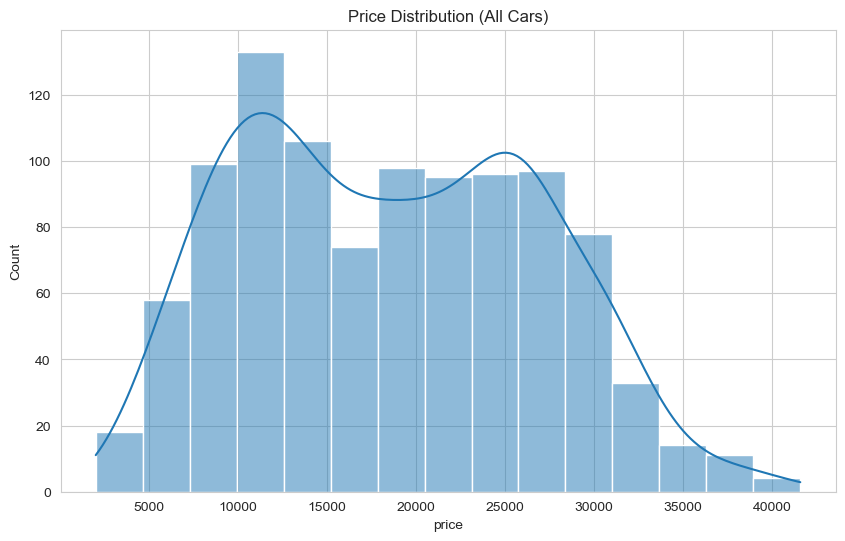

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

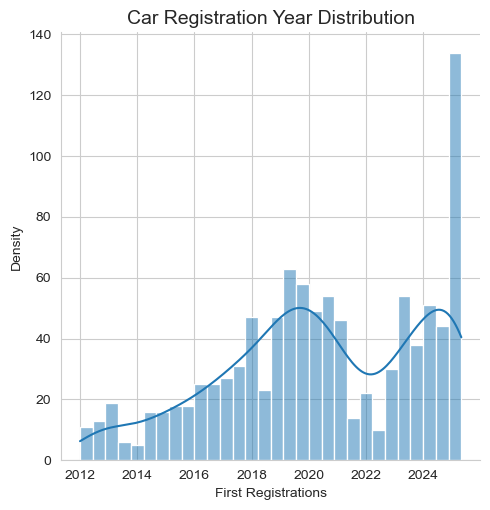

In [91]:
# Density Histogram of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution (All Cars)")
# plt.savefig('output/price_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.displot(df, x='first_registration', kde=True, bins=30)
plt.title('Car Registration Year Distribution', fontsize=14)
plt.xlabel('First Registrations')
plt.ylabel('Density')
# plt.savefig('output/registration_year_distribution.png')
plt.show()

In [110]:
# Calculate mean prices by fuel type
fuel_mean_prices = round(df.groupby('fuel_type')['price'].mean(), 2)
print("\n=== Mean Prices by Fuel Type ===")
print(fuel_mean_prices)

# Calculate mean prices for Minivan vs Cargo
vehicle_mean_prices = round(df.groupby('vehicle_type')['price'].mean(), 2)
print("\n=== Mean Prices by Vehicle Type ===")
print(vehicle_mean_prices)


=== Mean Prices by Fuel Type ===
fuel_type
Benzin     17844.77
Diesel     17601.87
Elektro    26985.36
Name: price, dtype: float64

=== Mean Prices by Vehicle Type ===
vehicle_type
cargo      13674.00
minivan    19885.95
Name: price, dtype: float64


In [111]:
# Extract mean prices for minivan and cargo
mean_minivan_price = vehicle_mean_prices.get('minivan', 0)
mean_cargo_price = vehicle_mean_prices.get('cargo', 0)

# Calculate percentage difference
if mean_minivan_price > 0:  # To avoid division by zero
    percentage_difference = ((mean_minivan_price - mean_cargo_price) / mean_cargo_price) * 100
    print(f"Percentage difference: {percentage_difference:.2f}%")
else:
    print("Mean cargo price is zero, can't calculate percentage difference")

Percentage difference: 45.43%


#### 3. Outlier Handling
 - **Actions Taken**:
   - CO2 outliers replaced with mean (non-electric cars).
   - Extreme mileage outlier (500k km) replaced with year-group mean.


In [92]:
# Code:
# Replace CO2 outliers >250 with mean (non-electric)
co2_mean = df.loc[(df['fuel_type'] != 'Elektro') & (df['co2_emissions'] <= 250), 'co2_emissions'].mean()
df.loc[(df['fuel_type'] != 'Elektro') & (df['co2_emissions'] > 250), 'co2_emissions'] = co2_mean

In [94]:
# Handle mileage outlier (500k km)
outlier_year = df[df['mileage'] >= 400000]['first_registration'].dt.year.values[0]
mean_mileage = df[df['first_registration'].dt.year == outlier_year]['mileage'].mean()
df.loc[df['mileage'] == 500000, 'mileage'] = mean_mileage

#### 4. Key Relationships & Insights
 - **Primary Findings**:
   - Price vs. Mileage (with regression).
  - Price differences by fuel type and vehicle type.

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_78190/4046804098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


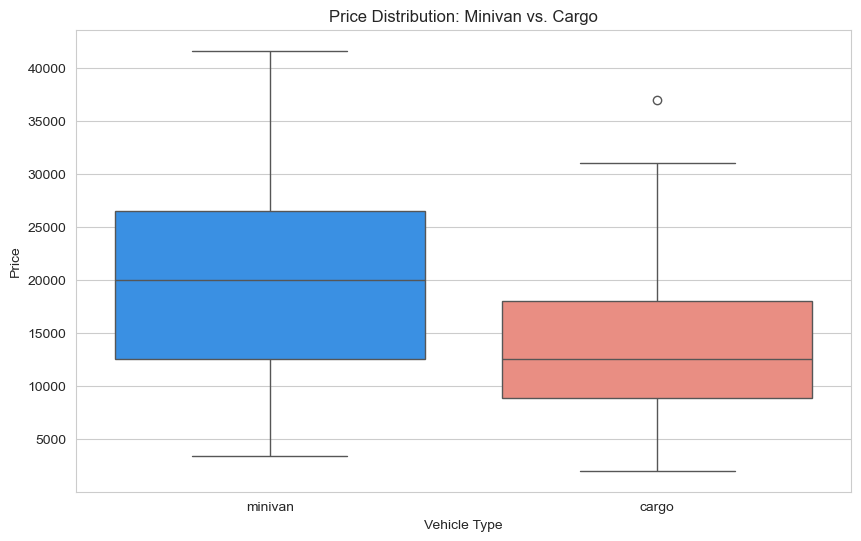

In [106]:
custom_palette = {
    'minivan': 'dodgerblue',
    'cargo': 'salmon'
}

# Plot with custom colors for vehicle types
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='vehicle_type', 
    y='price',
    order=['minivan', 'cargo'],  # Ensure consistent ordering
    palette=custom_palette
)
plt.title("Price Distribution: Minivan vs. Cargo")
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.savefig('output/price_vehicle_type.png')
plt.show()

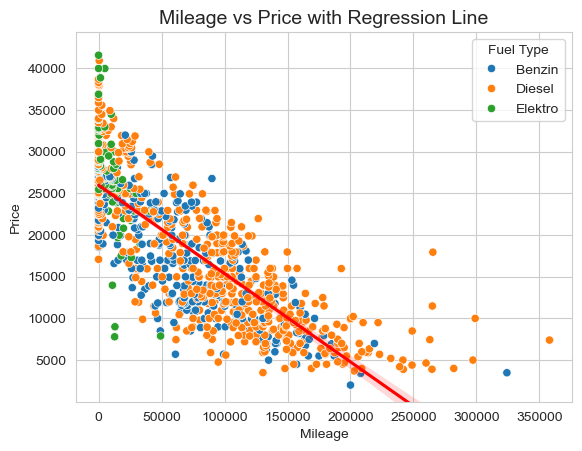

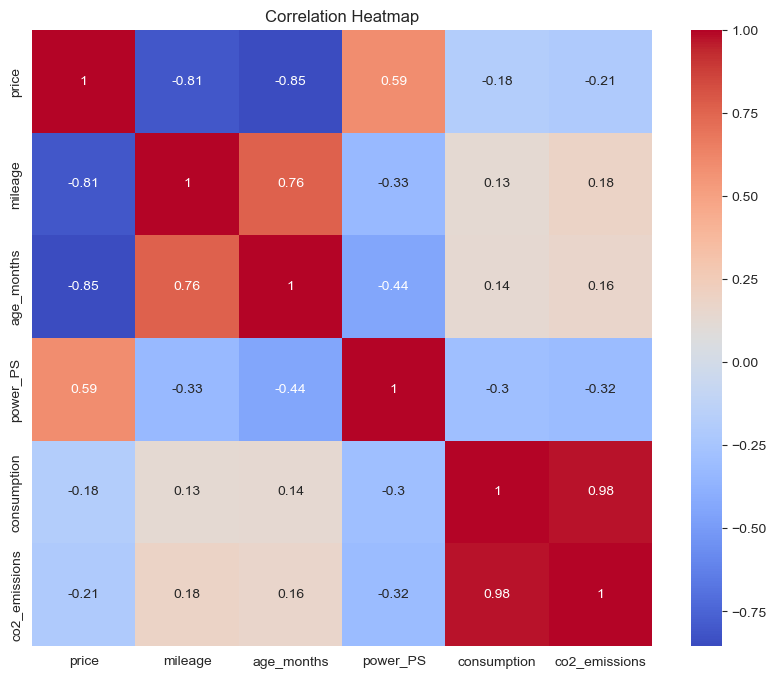

In [126]:
# Mileage vs Price (Log Scale)
# visualize the data (problem is that )
sns.scatterplot(data=df_clean, x='mileage', y='price', hue='fuel_type')
sns.regplot(data=df_clean, x='mileage', y='price', scatter=False, color='red')
plt.ylim(bottom=min(df_clean['mileage'].min(), 0) + 1)  # Ensures y-axis starts above 0
plt.title('Mileage vs Price with Regression Line', fontsize=14)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.savefig('output/mileage_vs_price_log_fuel.png')
plt.show()

# plt.figure(figsize=(10, 6))
# sns.regplot(data=df, x='mileage', y='price', logx=True, scatter_kws={'alpha':0.5})
# plt.title("Mileage vs. Price (Log Scale)")
# plt.savefig('output/mileage_vs_price_log.png')
# plt.show()

# Heatmap of Correlations
corr_matrix = df[['price', 'mileage', 'age_months', 'power_PS', 'consumption', 'co2_emissions']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('output/correlation_heatmap.png')
plt.show()

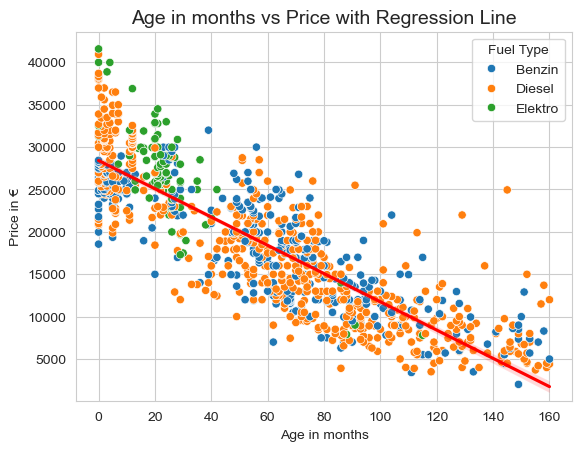

In [124]:
# visualize the data (problem is that )
sns.scatterplot(data=df, x='age_months', y='price', hue='fuel_type')
sns.regplot(data=df, x='age_months', y='price', scatter=False, color='red')
plt.ylim(bottom=min(df['age_months'].min(), 0) + 1)  # Ensures y-axis starts above 0
plt.title('Age in months vs Price with Regression Line', fontsize=14)
plt.xlabel('Age in months')
plt.ylabel('Price in €')
plt.legend(title='Fuel Type')
plt.savefig('output/age_vs_price_log_fuel.png')
plt.show()

In [129]:
# Calculate depreciation for 5-year-old cars
price_new_cars = df[df['age_years'] == 0]['price'].mean()  # Assuming new cars with age = 0
price_5_year_cars = df[df['age_years'] == 5]['price'].mean()

# Calculate the average depreciation
depreciation_5_years = price_new_cars - price_5_year_cars
print(f"Depreciation over first 5 years: €{depreciation_5_years:.2f}")

Depreciation over first 5 years: €11828.45


In [137]:
# Calculate depreciation for 5-year-old cars
price_new_cars = df[df['age_years'] == 6]['price'].mean()  # Assuming new cars with age = 0
price_10_year_cars = df[df['age_years'] == 10]['price'].mean()

# Calculate the average depreciation
depreciation_4_years = price_new_cars - price_10_year_cars
print(f"Depreciation over 4 years: €{depreciation_4_years:.2f}")

Depreciation over 4 years: €5866.43


14817.77358490566

In [113]:
# Ensure your columns are in the right numeric format
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['age_months'] = pd.to_numeric(df['age_months'], errors='coerce')

# Calculate correlation
correlation_mileage_price = df['price'].corr(df['mileage'])
correlation_age_price = df['price'].corr(df['age_months'])

print(f"Correlation between mileage and price: {correlation_mileage_price:.2f}")
print(f"Correlation between age and price: {correlation_age_price:.2f}")

Correlation between mileage and price: -0.81
Correlation between age and price: -0.85


In [122]:
# Filtering based on mileage groups
price_lt_50000 = df[df['mileage'] < 50000]['price'].mean()
price_gt_150000 = df[df['mileage'] > 150000]['price'].mean()

# Calculate percentage difference
if price_gt_150000 > 0:  # To avoid division by zero
    percentage_difference = ((price_lt_50000 - price_gt_150000) / price_gt_150000) * 100
    print(f"Percentage difference: {percentage_difference:.2f}%")
else:
    print("Price for >150,000 km is zero, can't calculate percentage difference")

Percentage difference: 225.80%


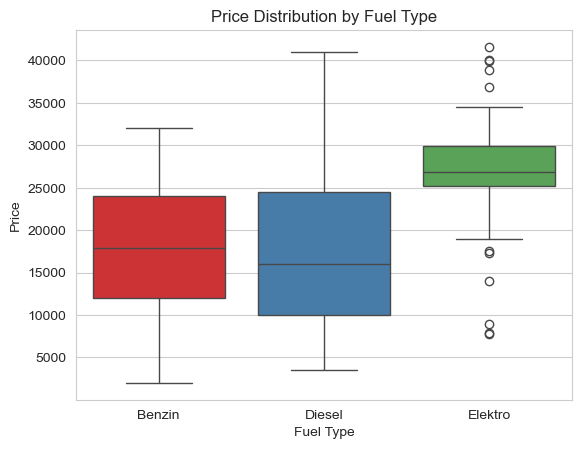

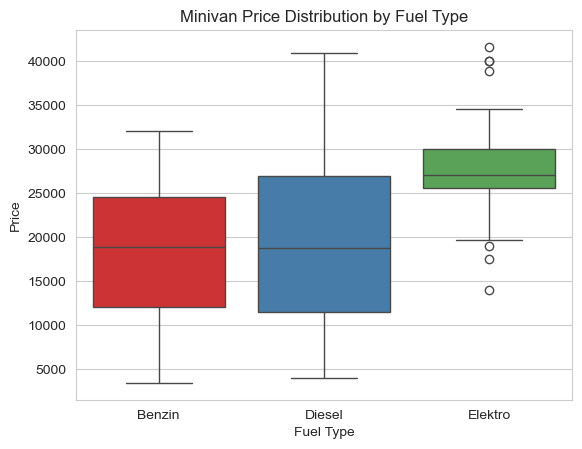

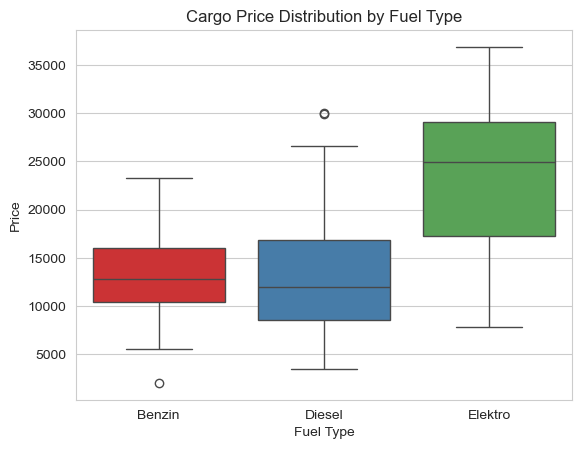

In [103]:
# Compare the price distribution across different fuel types for all the cars and for minivan and cargo (3 set of plots)
# 3 sets of plots with different pallets

# Get unique fuel types and create a sub-palette for them
unique_fuel_types = df['fuel_type'].unique()
n_fuel_types = len(unique_fuel_types)

# Define distinct palettes, ensuring they match the number of unique fuel types
palette_general = sns.color_palette("Set1", n_colors=n_fuel_types)
palette_minivan = sns.color_palette("Set2", n_colors=n_fuel_types)
palette_cargo = sns.color_palette("Set3", n_colors=n_fuel_types)

# General price distribution
sns.boxplot(data=df, x='fuel_type', y='price', palette=palette_general, hue='fuel_type', dodge=False)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.legend([],[], frameon=False)  # Hide legend placeholder for consistent look
plt.savefig(f'output/price_fueltype_both.png')
plt.show()

# Minivan price distribution
df_minivan = df[df['vehicle_type'] == 'minivan']
sns.boxplot(data=df_minivan, x='fuel_type', y='price', palette=palette_general, hue='fuel_type', dodge=False)
plt.title('Minivan Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.legend([],[], frameon=False)
plt.savefig(f'output/price_fueltype_minivan.png')
plt.show()

# Cargo price distribution
df_cargo = df[df['vehicle_type'] == 'cargo']
sns.boxplot(data=df_cargo, x='fuel_type', y='price', palette=palette_general, hue='fuel_type', dodge=False)
plt.title('Cargo Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.legend([],[], frameon=False)
plt.savefig(f'output/price_fueltype_cargo.png')
plt.show()

### Conclusions & Recommendations
 - **Key Insights**:
   1. Diesel vehicles are priced higher than Petrol counterparts, but have a lower mean. That is because it has a much bigger distribuition rage.
   2. Minivans (family) command a premium over cargo models.
   3. Mileage has a stronger inverse correlation with price than age.
 - **Next Steps**:
   - Focus marketing on low-mileage Diesel minivans.
   - Investigate why Elektro vehicles show price variability.

### Working/Draft EDA Section

--------------------------------------------------
#### Exploratory code, tests, and unused visualizations
--------------------------------------------------

#### 1. Outlier Detection (IQR/Z-Score)
- **Purpose**: Identify boundaries for outliers.

In [98]:
# Price IQR Outliers
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_outliers = df[(df['price'] < (Q1_price - 1.5 * IQR_price)) | (df['price'] > (Q3_price + 1.5 * IQR_price))]

# CO2 Emissions IQR (Non-Electric)
non_electric = df[df['fuel_type'] != 'Elektro']
Q1_co2 = non_electric['co2_emissions'].quantile(0.25)
Q3_co2 = non_electric['co2_emissions'].quantile(0.75)
IQR_co2 = Q3_co2 - Q1_co2
co2_outliers = non_electric[(non_electric['co2_emissions'] < (Q1_co2 - 1.5 * IQR_co2)) | (non_electric['co2_emissions'] > (Q3_co2 + 1.5 * IQR_co2))]

#### 2. Additional Visualizations (Unused)
- **Notes**: Exploratory plots kept for reference.

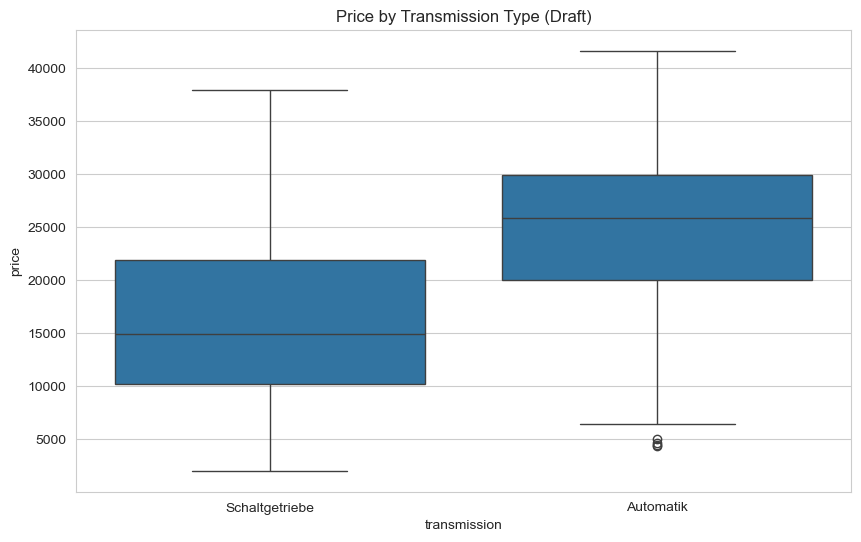

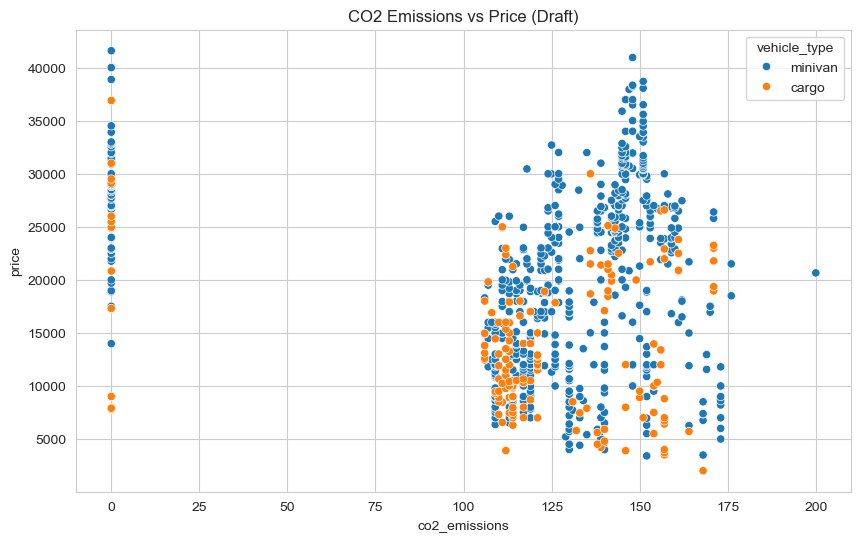

In [99]:
# Transmission vs Price (Not Statistically Significant)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title("Price by Transmission Type (Draft)")
plt.show()

# CO2 vs Price (No Clear Trend)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='co2_emissions', y='price', hue='vehicle_type')
plt.title("CO2 Emissions vs Price (Draft)")
plt.show()